In [1]:
import os
import sys
import time

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import tensorflow
import tensorflow as tf
tf.__version__

'1.14.0'

In [5]:
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
tf.logging.set_verbosity(tf.logging.WARN)

In [6]:
cwd = os.getcwd()
cwd

'/data/TimeSeriesForcasting'

In [7]:
steps = 200
x = np.array(range(steps))
noise = np.random.uniform(-0.25, 0.25, steps)
y = np.sin(np.pi * x / 30) + np.cos(np.pi * x / 10) + x / 200. + noise
x.shape, y.shape

((200,), (200,))

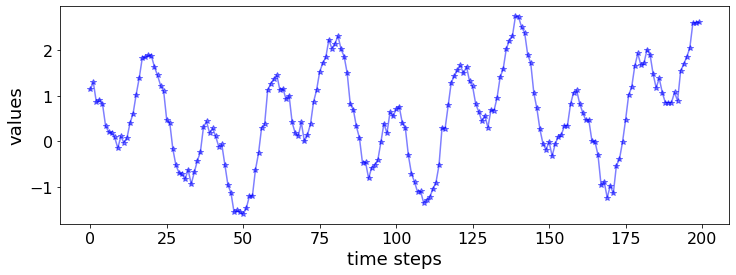

In [8]:
plt.figure(figsize=(12,4))
plt.plot(x, y, '-*',color='b', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.show()

In [9]:
steps_valid = 100
x_valid = np.array(np.arange(steps,steps+steps_valid))
noise_valid = np.random.uniform(-0.25, 0.25, steps_valid)
y_valid = np.sin(np.pi * x_valid / 30) + np.cos(np.pi * x_valid / 10) + x_valid / 200. + noise_valid

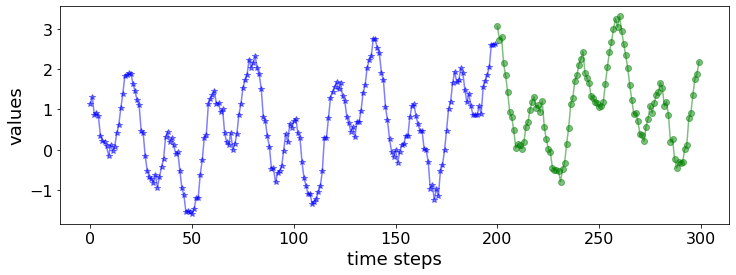

In [10]:
plt.figure(figsize=(12,4))
plt.plot(x, y, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.show()

In [11]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y
}

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader, batch_size=20, window_size=30)

ar = tf.contrib.timeseries.ARRegressor(
        periodicities=20, input_window_size=20, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

_ = ar.train(input_fn=train_input_fn, steps=600)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.filter(...).shuffle(min_after_dequeue).batch(batch_size)`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions 

In [12]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [13]:
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
evaluation, steps=steps_valid)))

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.


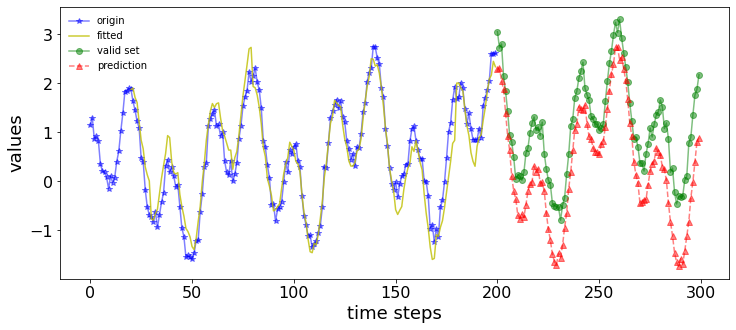

In [14]:
plt.figure(figsize=(12,5))

x = data['times'].reshape(-1)
y = data['values'].reshape(-1)
plt.plot(x, data['values'].reshape(-1), '-*', color='b', alpha=0.5, label='origin')

x = evaluation['times'].reshape(-1)
y = evaluation['mean'].reshape(-1)
s = np.sqrt(evaluation['covariance'].reshape(-1))
plt.plot(x, evaluation['mean'].reshape(-1), color='y', alpha=0.8, label='fitted')


x = predictions['times'].reshape(-1)
y = predictions['mean'].reshape(-1)
s = np.sqrt(predictions['covariance'].reshape(-1))
plt.plot(x_valid, y_valid, '-o',  color='g', alpha=0.5, label='valid set')

plt.plot(x, y, '--^' ,color='red', alpha=0.5, label='prediction')


plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [15]:
y.shape, y_valid.shape

((100,), (100,))

In [16]:
MSE = np.square(np.subtract(y,y_valid)).mean() 

RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.8700678210314653


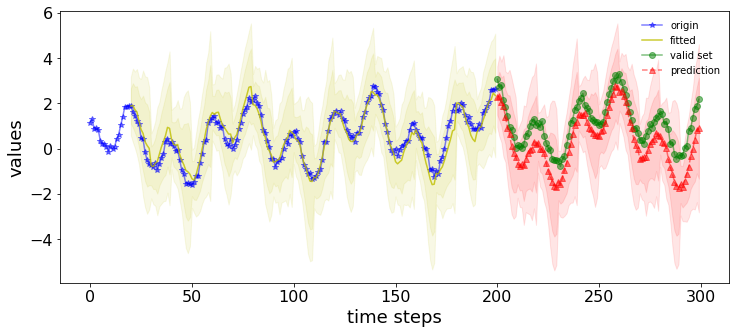

In [17]:
plt.figure(figsize=(12,5))

x = data['times'].reshape(-1)
y = data['values'].reshape(-1)
plt.plot(x, data['values'].reshape(-1), '-*', color='b', alpha=0.5, label='origin')

x = evaluation['times'].reshape(-1)
y = evaluation['mean'].reshape(-1)
s = np.sqrt(evaluation['covariance'].reshape(-1))
plt.plot(x, evaluation['mean'].reshape(-1), color='y', alpha=0.8, label='fitted')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='y')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='y')

x = predictions['times'].reshape(-1)
y = predictions['mean'].reshape(-1)
s = np.sqrt(predictions['covariance'].reshape(-1))
plt.plot(x_valid, y_valid, '-o',  color='g', alpha=0.5, label='valid set')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='r')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='r')

plt.plot(x, y, '--^' ,color='red', alpha=0.5, label='prediction')


plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

# Mackey-Glass data

In [18]:
y_mck=np.load(os.path.join(cwd+'/data_timeseries/', 'y_mck.npy'))
y_mck.shape

(1000,)

In [19]:
steps_valid = 100
nsteps=int(y_mck.shape[0]-steps_valid)

In [20]:
y=y_mck[0:nsteps]
y_valid=y_mck[nsteps:]
y.shape, y_valid.shape

((900,), (100,))

In [21]:
x = np.linspace(0, nsteps, num=len(y))
x_valid = np.linspace(nsteps,len(y)+len(y_valid), num=len(y_valid))
x.shape, x_valid.shape

((900,), (100,))

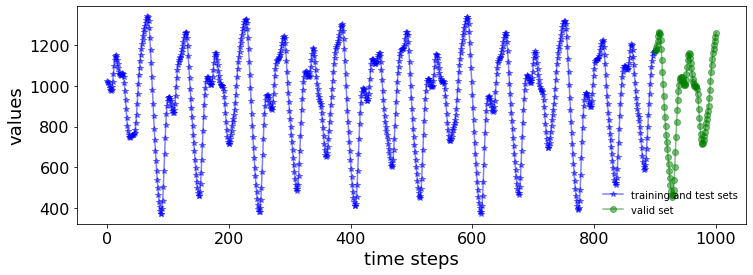

In [22]:
plt.figure(figsize=(12,4))
plt.plot(x, y, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [23]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()
# y_trans = sc.fit_transform(y[:,np.newaxis])
#y=y_trans.reshape(-1)


In [24]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y
}

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader, batch_size=1, window_size=30)

ar = tf.contrib.timeseries.ARRegressor(
        periodicities=20, input_window_size=20, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

_ = ar.train(input_fn=train_input_fn, steps=100)

In [25]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=10)

In [26]:
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
evaluation, steps=steps_valid)))

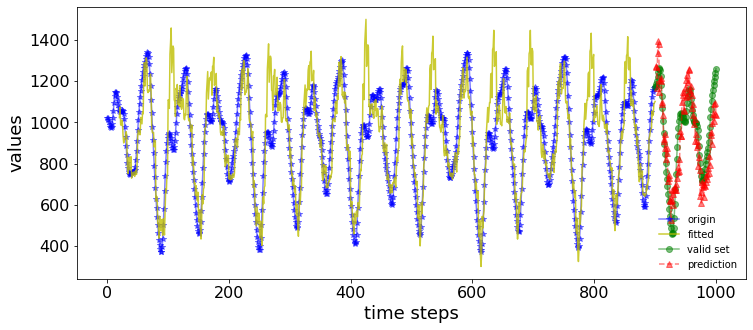

In [27]:
plt.figure(figsize=(12,5))

x = data['times'].reshape(-1)
y = data['values'].reshape(-1)
plt.plot(x, data['values'].reshape(-1), '-*', color='b', alpha=0.5, label='origin')

x = evaluation['times'].reshape(-1)
y = evaluation['mean'].reshape(-1)
s = np.sqrt(evaluation['covariance'].reshape(-1))
plt.plot(x, evaluation['mean'].reshape(-1), color='y', alpha=0.8, label='fitted')


x = predictions['times'].reshape(-1)
y = predictions['mean'].reshape(-1)
s = np.sqrt(predictions['covariance'].reshape(-1))
plt.plot(x_valid, y_valid, '-o',  color='g', alpha=0.5, label='valid set')

plt.plot(x, y, '--^' ,color='red', alpha=0.5, label='prediction')

plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

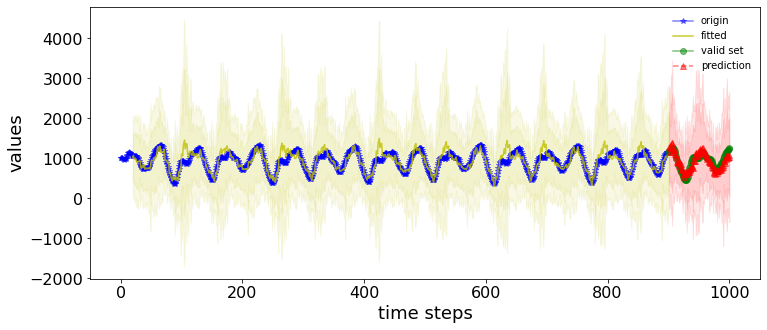

In [28]:
plt.figure(figsize=(12,5))

x = data['times'].reshape(-1)
y = data['values'].reshape(-1)
plt.plot(x, data['values'].reshape(-1), '-*', color='b', alpha=0.5, label='origin')

x = evaluation['times'].reshape(-1)
y = evaluation['mean'].reshape(-1)
s = np.sqrt(evaluation['covariance'].reshape(-1))
plt.plot(x, evaluation['mean'].reshape(-1), color='y', alpha=0.8, label='fitted')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='y')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='y')

x = predictions['times'].reshape(-1)
y = predictions['mean'].reshape(-1)
s = np.sqrt(predictions['covariance'].reshape(-1))
plt.plot(x_valid, y_valid, '-o',  color='g', alpha=0.5, label='valid set')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='r')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='r')

plt.plot(x, y, '--^' ,color='red', alpha=0.5, label='prediction')

plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()